In [1]:
%matplotlib inline 
from scipy import stats
import matplotlib.pyplot as plt 
import pandas as pd 
import numpy as np


In [24]:
vaccine_data_to_load = "vaccine-preventable-disease-cases-by-county-and-year-2.csv" 

#Read the Mouse and Drug Data and the Clinical Trial Data
Vax_Data = pd.read_csv("vaccine-preventable-disease-cases-by-county-and-year-2.csv") 

file = 'Population_Data.csv'


In [4]:
#Drop disease we are not going to analyze
dd = Vax_Data.set_index("disease")
dd_drop = dd.drop(["Diphtheria","Hepatitis A", "Hepatitis B, Acute", "Hepatitis C, Acute", "Invasive Meningococcal Disease", "Rubella", "Varicella Hospitalizations"])
dd_drop = dd_drop.reset_index()
dd_drop_counties = dd_drop.set_index("county")

# drop counties we are not going to analyze

# this is what I used to drop the counties with just adding commas:
#print(Vax_Data.iloc[:,1].unique())
# I copied and pasted the output.  I added 15 commas.  


dd_complete_4 = dd_drop_counties.drop([ 'Alpine', 'Amador', 'Butte', 'Calaveras', 'California', 'Colusa',
 'Contra Costa', 'Del Norte', 'El Dorado', 'Fresno', 'Glenn' ,'Humboldt',
 'Imperial', 'Inyo', 'Kern' ,'Kings' ,'Lake' ,'Lassen', 'Madera',
 'Marin', 'Mariposa', 'Mendocino', 'Merced', 'Modoc', 'Mono', 'Monterey', 'Napa',
 'Nevada' ,'Orange', 'Placer' ,'Plumas', 'Riverside', 'Sacramento' ,'San Benito',
 'San Bernardino', 'San Diego' ,'San Francisco', 'San Joaquin',
 'San Luis Obispo', 'San Mateo', 'Santa Barbara' ,'Santa Clara' ,'Santa Cruz',
 'Shasta' ,'Sierra', 'Siskiyou' ,'Solano' ,'Stanislaus', 'Sutter',
 'Tehama', 'Trinity', 'Tulare', 'Tuolumne', 'Ventura' ,'Yolo'])
dd_complete_4 = dd_complete_4.reset_index()

#same print unique, copy & paste, add commas. Looks ugly - but we are looking at the data, instead of looking at code

dd_complete_15 = dd_drop_counties.drop([ 'Alpine', 'Amador', 'Butte', 'Calaveras', 'California', 'Colusa',
 'Contra Costa', 'Del Norte', 'Fresno', 'Glenn' ,'Humboldt',
 'Imperial', 'Inyo', 'Kings' ,'Lake' ,'Lassen', 'Madera',
 'Marin', 'Mariposa', 'Mendocino', 'Modoc', 'Mono', 'Monterey',
 'Nevada' , 'Placer' ,'Plumas', 'Riverside' ,'San Benito',
 'San Bernardino' ,'San Francisco', 'San Joaquin',
 'San Luis Obispo' ,'Santa Clara' ,'Santa Cruz',
 'Shasta' , 'Siskiyou' ,'Solano' ,'Stanislaus', 'Sutter',
 'Tehama', 'Trinity', 'Tulare', 'Tuolumne' ,'Yolo'])

dd_complete_15 = dd_complete_15.reset_index()

# dd_complete_4 should be exported to csv for use in individual branches
# dd_complete_15 should also be exported for same reason


In [74]:
#mung data to fit counts of measles per year (2009-2017) by county

dyr = dd_complete_4.set_index('year')
dyrs = dyr.drop([2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008])

ddyr_alameda = dyrs[dyrs["county"]== "Alameda"]
ddyr_alameda_meas = ddyr_alameda[ddyr_alameda["disease"]== "Measles"]

ddyr_la = dyrs[dyrs["county"]== "Los Angeles"]
ddyr_la_meas = ddyr_la[ddyr_la["disease"]== "Measles"]

ddyr_yuba = dyrs[dyrs["county"]== "Yuba"]
ddyr_yuba_meas = ddyr_yuba[ddyr_yuba["disease"]== "Measles"]

ddyr_sonoma = dyrs[dyrs["county"]== "Sonoma"]
ddyr_sonoma_meas = ddyr_sonoma[ddyr_sonoma["disease"]== "Measles"]


In [75]:
# now for Pertussis
ddyr_alameda = dyrs[dyrs["county"]== "Alameda"]
ddyr_alameda_pert = ddyr_alameda[ddyr_alameda["disease"]== "Pertussis"]

ddyr_la = dyrs[dyrs["county"]== "Los Angeles"]
ddyr_la_pert = ddyr_la[ddyr_la["disease"]== "Pertussis"]

ddyr_yuba = dyrs[dyrs["county"]== "Yuba"]
ddyr_yuba_pert = ddyr_yuba[ddyr_yuba["disease"]== "Pertussis"]

ddyr_sonoma = dyrs[dyrs["county"]== "Sonoma"]
ddyr_sonoma_pert = ddyr_sonoma[ddyr_sonoma["disease"]== "Pertussis"]


In [76]:
# now for Mumps
ddyr_alameda = dyrs[dyrs["county"]== "Alameda"]
ddyr_alameda_mump = ddyr_alameda[ddyr_alameda["disease"]== "Mumps"]

ddyr_la = dyrs[dyrs["county"]== "Los Angeles"]
ddyr_la_mump = ddyr_la[ddyr_la["disease"]== "Mumps"]

ddyr_yuba = dyrs[dyrs["county"]== "Yuba"]
ddyr_yuba_mump = ddyr_yuba[ddyr_yuba["disease"]== "Mumps"]

ddyr_sonoma = dyrs[dyrs["county"]== "Sonoma"]
ddyr_sonoma_mump = ddyr_sonoma[ddyr_sonoma["disease"]== "Mumps"]



In [77]:
ddyr_alameda = dyrs[dyrs["county"]== "Alameda"]
ddyr_alameda_tet = ddyr_alameda[ddyr_alameda["disease"]== "Tetanus"]

ddyr_la = dyrs[dyrs["county"]== "Los Angeles"]
ddyr_la_tet = ddyr_la[ddyr_la["disease"]== "Tetanus"]

ddyr_yuba = dyrs[dyrs["county"]== "Yuba"]
ddyr_yuba_tet = ddyr_yuba[ddyr_yuba["disease"]== "Tetanus"]

ddyr_sonoma = dyrs[dyrs["county"]== "Sonoma"]
ddyr_sonoma_tet = ddyr_sonoma[ddyr_sonoma["disease"]== "Tetanus"]


In [120]:
#mung population data
pop_read = pd.read_csv(file)
#pop_years = pop_read.drop(['2018'], axis = 1)
pop_years_fin = pop_read.set_index("County")
pop_for_scatter = pd.DataFrame(pop_years_fin)
pop_for_scatter.head()


,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
County,,,,,,,,,,
Alameda County,1491482,1513043,1530998,1554138,1580247,1608674,1634634,1650306,1658131,1666753
El Dorado County,178447,181133,180918,180578,181497,183161,184660,186082,188722,190678
Kern County,807407,841072,848140,853963,862557,869957,877197,882361,888988,896764
Los Angeles County,9848011,9822433,9876727,9938436,9998105,10048408,10097037,10120540,10118759,10105518
Merced County,245321,256732,259333,260971,262198,264649,266651,267971,271340,274765


In [78]:
# Make dataframe that shows the difference of population over years for each county
# These new values should make for a better plot to compare against disease count over time
#This could be better if I had the 2008 data.  right now the difference is a year behind
pop_diff_LA = pop_for_scatter.iloc[3,:]
pop_diff_Yuba = pop_for_scatter.iloc[14,:]
pop_diff_Alameda = pop_for_scatter.iloc[0,:]
pop_diff_Sonoma = pop_for_scatter.iloc[12,:]

diff_LA = []
diff_Yuba = []
diff_Alameda = []
diff_Sonoma = []

for i in range(1,len(pop_diff_LA)):
    difference_results = pop_diff_LA[i] - pop_diff_LA[i-1]
    diff_LA.append(difference_results)
for i in range(1,len(pop_diff_Yuba)):
    difference_results = pop_diff_Yuba[i] - pop_diff_Yuba[i-1]
    diff_Yuba.append(difference_results)
for i in range(1,len(pop_diff_Alameda)):
    difference_results = pop_diff_Alameda[i] - pop_diff_Alameda[i-1]
    diff_Alameda.append(difference_results)
for i in range(1,len(pop_diff_Sonoma)):
    difference_results = pop_diff_Sonoma[i] - pop_diff_Sonoma[i-1]
    diff_Sonoma.append(difference_results)


In [ ]:
#The Graphs for compairing populations didn't read well becuase of the huge differences in total populations
#instead, I calculated the change per year of population to make the comparison more digestible

In [ ]:
#mung population data
pop_read = pd.read_csv(file)
pop_read
#pop_years = pop_read.drop(['2018'], axis = 1)
pop_years_fin = pop_read.set_index("County")
pop_for_scatter = pd.DataFrame(pop_years_fin)

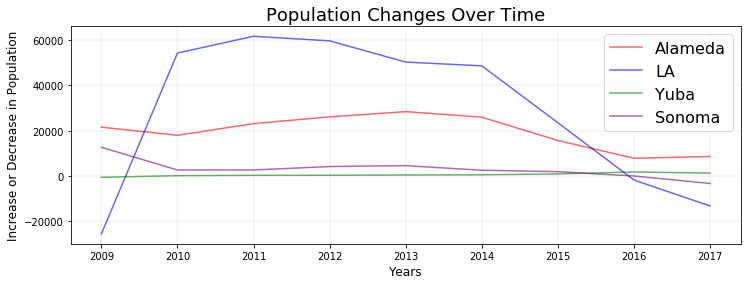

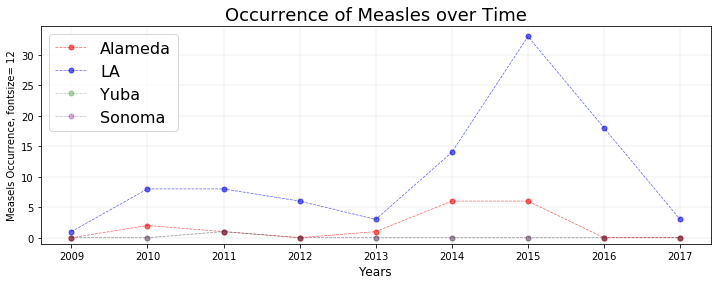

In [119]:
#population by 4 counties and years
x_axis = ["2009", "2010", "2011", "2012", "2013", "2014", "2015", "2016", "2017"]

plt.figure(figsize=(12,4))
plt.title('Population Changes Over Time', fontsize = 18)
plt.xlabel('Years', fontsize=12)
plt.ylabel('Increase or Decrease in Population', fontsize= 12)
plt.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)

plt.plot(x_axis, diff_Alameda, color = 'r', alpha = 0.6, label = "Alameda")
plt.plot(x_axis, diff_LA, color = 'b', alpha = 0.6, label = "LA")
plt.plot(x_axis, diff_Yuba, color = 'g', alpha = 0.6, label = "Yuba")
plt.plot(x_axis, diff_Sonoma, color = 'purple', alpha = 0.6, label = "Sonoma")
plt.legend(fontsize = 16)
plt.show()

#setting up Measels plot lables, titles, etc.
plt.figure(figsize=(12,4))
plt.title('Occurrence of Measles over Time', fontsize = 18)
plt.xlabel('Years', fontsize=12)
plt.ylabel('Measels Occurrence, fontsize= 12')
plt.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)

#measles by 4 counties and years
plt.plot(x_axis, ddyr_alameda_meas.iloc[:,2], marker = 'o', markersize=5, 
         linestyle="--", linewidth=0.75, color = 'r', alpha = 0.6, label = "Alameda",)
plt.plot(x_axis, ddyr_la_meas.iloc[:,2], marker = 'o', markersize=5, 
         linestyle="--", linewidth=0.75, color = 'b', alpha = 0.6, label = "LA",)
plt.plot(x_axis, ddyr_yuba_meas.iloc[:,2], marker = 'o', markersize=5, 
         linestyle="--", linewidth=0.75, color = 'g', alpha = 0.3, label = "Yuba",)
plt.plot(x_axis, ddyr_sonoma_meas.iloc[:,2], marker = 'o', markersize=5, 
         linestyle="--", linewidth=0.75, color = 'purple', alpha = 0.3, label = "Sonoma",)
plt.ylim(-1)
plt.legend(fontsize = 16)

plt.show()
#quick analysis = amounts of disease followed a trend easily seen in bigger populations, also seen in small


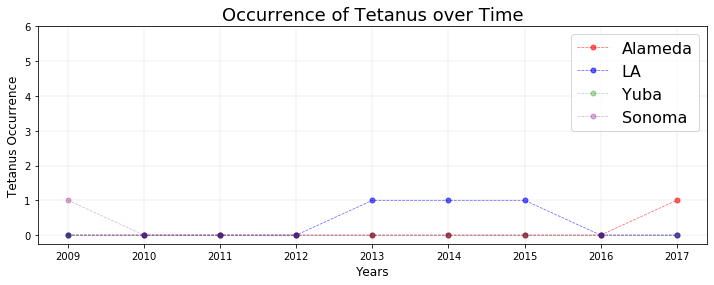

In [121]:
#now Tetanus
plt.figure(figsize=(12,4))
plt.title('Occurrence of Tetanus over Time', fontsize = 18)
plt.xlabel('Years', fontsize=12)
plt.ylabel('Tetanus Occurrence', fontsize= 12)
plt.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)

#tetanus by 4 counties and years
plt.plot(x_axis, ddyr_alameda_tet.iloc[:,2], marker = 'o', markersize=5, 
         linestyle="--", linewidth=0.75, color = 'r', alpha = 0.6, label = "Alameda",)
plt.plot(x_axis, ddyr_la_tet.iloc[:,2], marker = 'o', markersize=5, 
         linestyle="--", linewidth=0.75, color = 'b', alpha = 0.6, label = "LA",)
plt.plot(x_axis, ddyr_yuba_tet.iloc[:,2], marker = 'o', markersize=5, 
         linestyle="--", linewidth=0.75, color = 'g', alpha = 0.3, label = "Yuba",)
plt.plot(x_axis, ddyr_sonoma_tet.iloc[:,2], marker = 'o', markersize=5, 
         linestyle="--", linewidth=0.75, color = 'purple', alpha = 0.3, label = "Sonoma",)

plt.ylim(-.25,6)
plt.legend(fontsize = 16)

plt.show()

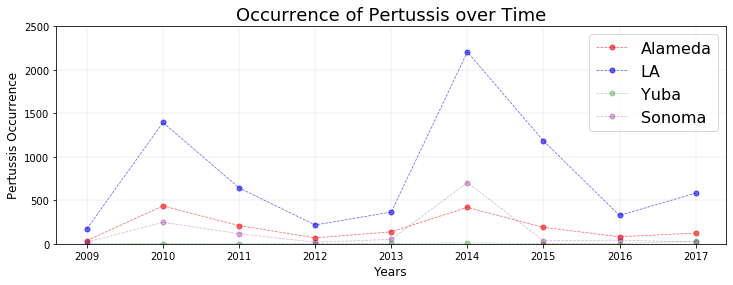

In [105]:
#now Pertussis
plt.figure(figsize=(12,4))
plt.title('Occurrence of Pertussis over Time', fontsize = 18)
plt.xlabel('Years', fontsize=12)
plt.ylabel('Pertussis Occurrence', fontsize= 12)
plt.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)

#tetanus by 4 counties and years
plt.plot(x_axis, ddyr_alameda_pert.iloc[:,2], marker = 'o', markersize=5, 
         linestyle="--", linewidth=0.75, color = 'r', alpha = 0.6, label = "Alameda",)
plt.plot(x_axis, ddyr_la_pert.iloc[:,2], marker = 'o', markersize=5, 
         linestyle="--", linewidth=0.75, color = 'b', alpha = 0.6, label = "LA",)
plt.plot(x_axis, ddyr_yuba_pert.iloc[:,2], marker = 'o', markersize=5, 
         linestyle="--", linewidth=0.75, color = 'g', alpha = 0.3, label = "Yuba",)
plt.plot(x_axis, ddyr_sonoma_pert.iloc[:,2], marker = 'o', markersize=5, 
         linestyle="--", linewidth=0.75, color = 'purple', alpha = 0.3, label = "Sonoma",)

plt.ylim(-.25,2500)
plt.legend(fontsize = 16)

plt.show()

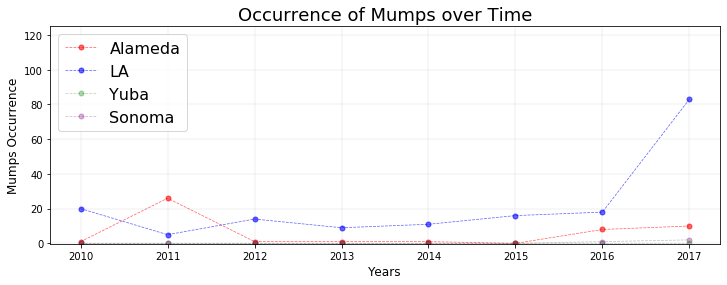

In [115]:
x_axis_mumps = ["2010", "2011", "2012", "2013", "2014", "2015", "2016", "2017"]
plt.figure(figsize=(12,4))
plt.title('Occurrence of Mumps over Time', fontsize = 18)
plt.xlabel('Years', fontsize=12)
plt.ylabel('Mumps Occurrence', fontsize= 12)
plt.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)

plt.plot(x_axis_mumps, ddyr_alameda_mump.iloc[:,2], marker = 'o', markersize=5, 
         linestyle="--", linewidth=0.75, color = 'r', alpha = 0.6, label = "Alameda",)
plt.plot(x_axis_mumps, ddyr_la_mump.iloc[:,2], marker = 'o', markersize=5, 
         linestyle="--", linewidth=0.75, color = 'b', alpha = 0.6, label = "LA",)
plt.plot(x_axis_mumps, ddyr_yuba_mump.iloc[:,2], marker = 'o', markersize=5, 
         linestyle="--", linewidth=0.75, color = 'g', alpha = 0.3, label = "Yuba",)
plt.plot(x_axis_mumps, ddyr_sonoma_mump.iloc[:,2], marker = 'o', markersize=5, 
         linestyle="--", linewidth=0.75, color = 'purple', alpha = 0.3, label = "Sonoma",)

plt.ylim(-.25,125)
plt.legend(fontsize = 16)

plt.show()